데이터 샘플:
  employee_residence employee_residence_korean  salary_in_usd
0                 DE                        독일          79833
1                 JP                        일본         260000
2                 GB                        영국         109024
3                 HN                      온두라스          20000
4                 US                        미국         150000


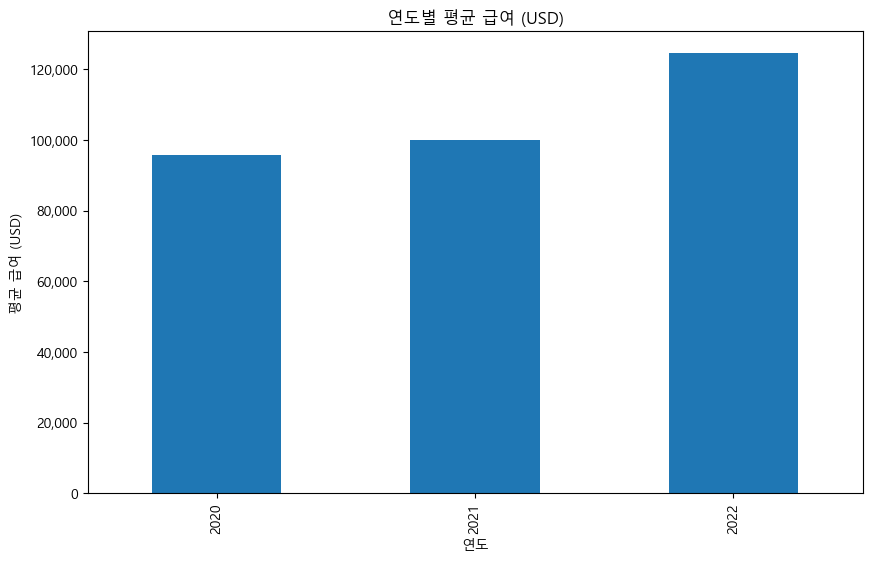

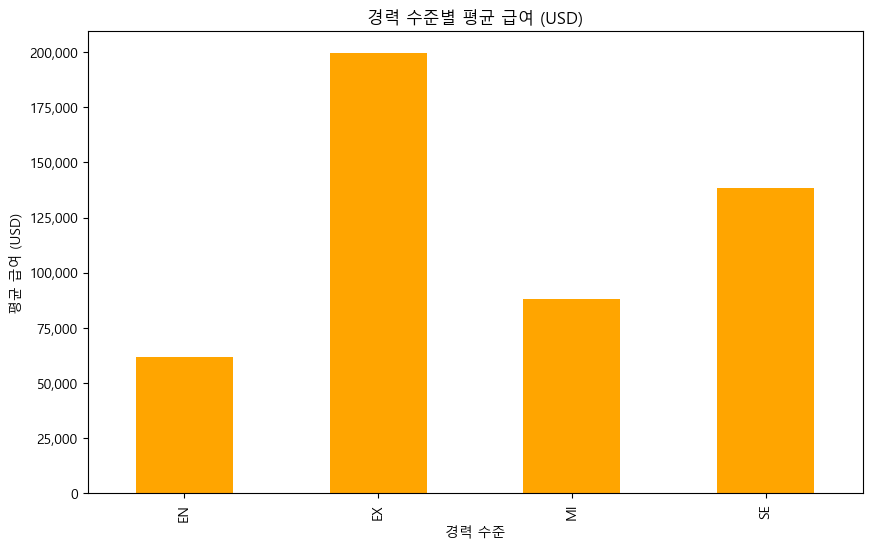

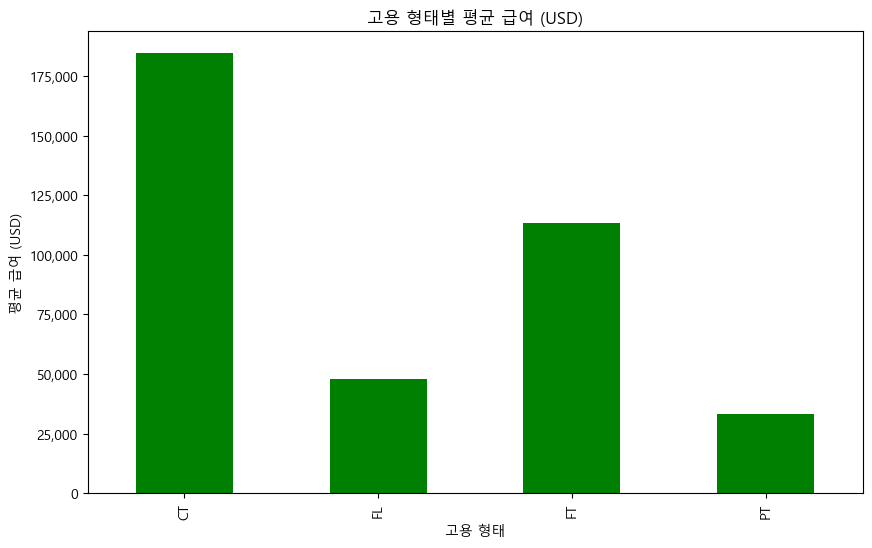

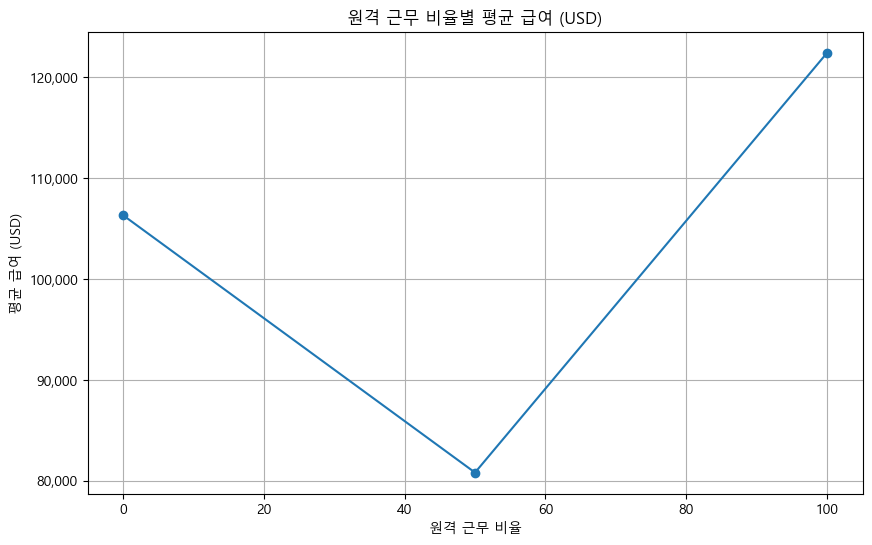

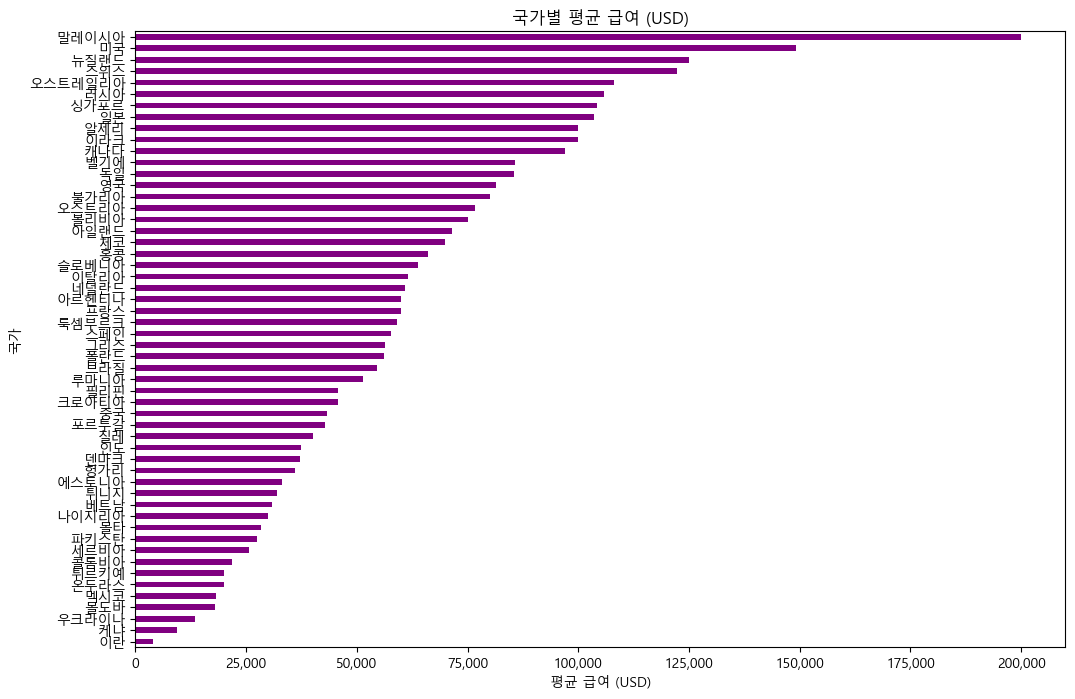

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정 (Mac: 'AppleGothic', Windows: 'Malgun Gothic')
import platform
if platform.system() == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='DejaVu Sans')  # Linux 등

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 숫자 포맷 함수 (천 단위 콤마 추가)
def comma_format(x, _):
    return f'{x:,.0f}'

# 국가 코드와 한국어 국가명 매핑
country_mapping = {
    'AR': '아르헨티나', 'AT': '오스트리아', 'AU': '오스트레일리아', 'BE': '벨기에', 'BG': '불가리아',
    'BO': '볼리비아', 'BR': '브라질', 'CA': '캐나다', 'CH': '스위스', 'CL': '칠레', 'CN': '중국',
    'CO': '콜롬비아', 'CR': '코스타리카', 'CY': '키프로스', 'CZ': '체코', 'DE': '독일', 'DK': '덴마크',
    'DZ': '알제리', 'EC': '에콰도르', 'EE': '에스토니아', 'EG': '이집트', 'ES': '스페인', 'FI': '핀란드',
    'FR': '프랑스', 'GB': '영국', 'GH': '가나', 'GR': '그리스', 'GT': '과테말라', 'HK': '홍콩',
    'HN': '온두라스', 'HR': '크로아티아', 'HU': '헝가리', 'ID': '인도네시아', 'IE': '아일랜드',
    'IL': '이스라엘', 'IN': '인도', 'IQ': '이라크', 'IR': '이란', 'IT': '이탈리아', 'JM': '자메이카',
    'JO': '요르단', 'JP': '일본', 'KE': '케냐', 'KH': '캄보디아', 'KR': '대한민국', 'KW': '쿠웨이트',
    'KZ': '카자흐스탄', 'LB': '레바논', 'LK': '스리랑카', 'LT': '리투아니아', 'LU': '룩셈부르크',
    'LV': '라트비아', 'MA': '모로코', 'MD': '몰도바', 'MK': '북마케도니아', 'MT': '몰타',
    'MU': '모리셔스', 'MX': '멕시코', 'MY': '말레이시아', 'NG': '나이지리아', 'NL': '네덜란드',
    'NO': '노르웨이', 'NZ': '뉴질랜드', 'PE': '페루', 'PH': '필리핀', 'PK': '파키스탄', 'PL': '폴란드',
    'PT': '포르투갈', 'PY': '파라과이', 'RO': '루마니아', 'RS': '세르비아', 'RU': '러시아',
    'SA': '사우디아라비아', 'SE': '스웨덴', 'SG': '싱가포르', 'SI': '슬로베니아', 'SK': '슬로바키아',
    'SV': '엘살바도르', 'TH': '태국', 'TN': '튀니지', 'TR': '튀르키예', 'UA': '우크라이나',
    'US': '미국', 'UY': '우루과이', 'UZ': '우즈베키스탄', 'VE': '베네수엘라', 'VN': '베트남',
    'ZA': '남아프리카 공화국'
}

# GitHub에서 데이터 로드
url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-15/ds_salaries.csv"
data = pd.read_csv(url)

# 국가 코드를 한글 국가명으로 변환
data['employee_residence_korean'] = data['employee_residence'].map(country_mapping)

# 데이터 미리보기
print("데이터 샘플:")
print(data[['employee_residence', 'employee_residence_korean', 'salary_in_usd']].head())

# 1. 연도별 급여 분포
plt.figure(figsize=(10, 6))
data.groupby('work_year')['salary_in_usd'].mean().plot(kind='bar')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))  # 콤마 추가
plt.title('연도별 평균 급여 (USD)')
plt.xlabel('연도')
plt.ylabel('평균 급여 (USD)')
plt.show()

# 2. 직급별 급여 분포
plt.figure(figsize=(10, 6))
data.groupby('experience_level')['salary_in_usd'].mean().plot(kind='bar', color='orange')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))  # 콤마 추가
plt.title('경력 수준별 평균 급여 (USD)')
plt.xlabel('경력 수준')
plt.ylabel('평균 급여 (USD)')
plt.show()

# 3. 고용 형태별 급여 분포
plt.figure(figsize=(10, 6))
data.groupby('employment_type')['salary_in_usd'].mean().plot(kind='bar', color='green')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))  # 콤마 추가
plt.title('고용 형태별 평균 급여 (USD)')
plt.xlabel('고용 형태')
plt.ylabel('평균 급여 (USD)')
plt.show()

# 4. 원격 근무 비율별 평균 급여
plt.figure(figsize=(10, 6))
data.groupby('remote_ratio')['salary_in_usd'].mean().plot(kind='line', marker='o')
plt.gca().yaxis.set_major_formatter(FuncFormatter(comma_format))  # 콤마 추가
plt.title('원격 근무 비율별 평균 급여 (USD)')
plt.xlabel('원격 근무 비율')
plt.ylabel('평균 급여 (USD)')
plt.grid()
plt.show()

# 5. 전체 국가별 급여 분포 (국가명을 한글로 표시)
plt.figure(figsize=(12, 8))
data.groupby('employee_residence_korean')['salary_in_usd'].mean().sort_values().plot(kind='barh', color='purple')
plt.gca().xaxis.set_major_formatter(FuncFormatter(comma_format))  # 콤마 추가
plt.title('국가별 평균 급여 (USD)')
plt.xlabel('평균 급여 (USD)')
plt.ylabel('국가')
plt.show()


In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# 한글 폰트 설정 (Mac: 'AppleGothic', Windows: 'Malgun Gothic')
import platform
if platform.system() == 'Darwin':  # Mac
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':  # Windows
    plt.rc('font', family='Malgun Gothic')
else:
    plt.rc('font', family='DejaVu Sans')  # Linux 등

plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 국가 코드와 한국어 국가명 매핑
country_mapping = {
    'AR': '아르헨티나', 'AT': '오스트리아', 'AU': '오스트레일리아', 'BE': '벨기에', 'BG': '불가리아',
    'BO': '볼리비아', 'BR': '브라질', 'CA': '캐나다', 'CH': '스위스', 'CL': '칠레', 'CN': '중국',
    'CO': '콜롬비아', 'CR': '코스타리카', 'CY': '키프로스', 'CZ': '체코', 'DE': '독일', 'DK': '덴마크',
    'DZ': '알제리', 'EC': '에콰도르', 'EE': '에스토니아', 'EG': '이집트', 'ES': '스페인', 'FI': '핀란드',
    'FR': '프랑스', 'GB': '영국', 'GH': '가나', 'GR': '그리스', 'GT': '과테말라', 'HK': '홍콩',
    'HN': '온두라스', 'HR': '크로아티아', 'HU': '헝가리', 'ID': '인도네시아', 'IE': '아일랜드',
    'IL': '이스라엘', 'IN': '인도', 'IQ': '이라크', 'IR': '이란', 'IT': '이탈리아', 'JM': '자메이카',
    'JO': '요르단', 'JP': '일본', 'KE': '케냐', 'KH': '캄보디아', 'KR': '대한민국', 'KW': '쿠웨이트',
    'KZ': '카자흐스탄', 'LB': '레바논', 'LK': '스리랑카', 'LT': '리투아니아', 'LU': '룩셈부르크',
    'LV': '라트비아', 'MA': '모로코', 'MD': '몰도바', 'MK': '북마케도니아', 'MT': '몰타',
    'MU': '모리셔스', 'MX': '멕시코', 'MY': '말레이시아', 'NG': '나이지리아', 'NL': '네덜란드',
    'NO': '노르웨이', 'NZ': '뉴질랜드', 'PE': '페루', 'PH': '필리핀', 'PK': '파키스탄', 'PL': '폴란드',
    'PT': '포르투갈', 'PY': '파라과이', 'RO': '루마니아', 'RS': '세르비아', 'RU': '러시아',
    'SA': '사우디아라비아', 'SE': '스웨덴', 'SG': '싱가포르', 'SI': '슬로베니아', 'SK': '슬로바키아',
    'SV': '엘살바도르', 'TH': '태국', 'TN': '튀니지', 'TR': '튀르키예', 'UA': '우크라이나',
    'US': '미국', 'UY': '우루과이', 'UZ': '우즈베키스탄', 'VE': '베네수엘라', 'VN': '베트남',
    'ZA': '남아프리카 공화국'
}

# GitHub에서 데이터 로드
url = "https://raw.githubusercontent.com/YangGuiBee/ML/main/TextBook-15/ds_salaries.csv"
data = pd.read_csv(url)

# 국가 코드를 한글 국가명으로 변환
data['employee_residence_korean'] = data['employee_residence'].map(country_mapping)

# 주요 특성 선택 및 전처리
data['experience_level'] = data['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})  # 경력 수준
data['employment_type'] = data['employment_type'].map({'PT': 0, 'CT': 1, 'FL': 2, 'FT': 3})  # 고용 형태
data['company_size'] = data['company_size'].map({'S': 0, 'M': 1, 'L': 2})  # 회사 규모

# 학습용 데이터와 타깃 변수 정의
features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
target = 'salary_in_usd'

X = data[features]
y = data[target]

# 데이터셋 분리 (학습: 80%, 테스트: 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)
print(f"평균 제곱 오차 (MSE): {mean_squared_error(y_test, y_pred):,.2f}")
print(f"결정 계수 (R^2): {r2_score(y_test, y_pred):.2f}")

# 2023년 예측
predict_2023 = pd.DataFrame({
    'work_year': [2023] * 3,
    'experience_level': [0, 1, 2],  # EN, MI, SE
    'employment_type': [3] * 3,     # FT
    'remote_ratio': [0, 50, 100],  # 원격 근무 비율
    'company_size': [2] * 3        # 대규모 회사
})

predicted_salary = model.predict(predict_2023)
predict_2023['predicted_salary'] = predicted_salary

print("\n2023년 예측된 급여:")
print(predict_2023)


평균 제곱 오차 (MSE): 2,925,342,302.11
결정 계수 (R^2): 0.24

2023년 예측된 급여:
   work_year  experience_level  employment_type  remote_ratio  company_size  \
0       2023                 0                3             0             2   
1       2023                 1                3            50             2   
2       2023                 2                3           100             2   

   predicted_salary  
0      66566.795860  
1     114816.906817  
2     163067.017774  


In [23]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 로컬 CSV 파일 경로 설정
file_path = "c:/konkuk/15/ds_salaries.csv"  # 다운로드한 파일 경로

# 데이터 로드
data = pd.read_csv(file_path)

# 주요 컬럼 처리
data['experience_level'] = data['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
data['employment_type'] = data['employment_type'].map({'PT': 0, 'CT': 1, 'FL': 2, 'FT': 3})
data['company_size'] = data['company_size'].map({'S': 0, 'M': 1, 'L': 2})

# 모델 학습 준비
features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
target = 'salary_in_usd'

# 2023년으로 work_year 업데이트
data['work_year'] = 2023

# 모델 학습
X_train = data[features]
y_train = data[target]
model = LinearRegression()
model.fit(X_train, y_train)

# 예측 수행
data['predicted_salary_2023'] = model.predict(X_train)

# R² 계산 및 출력
r2 = r2_score(y_train, data['predicted_salary_2023'])
print(f"모델의 R² (결정 계수): {r2:.4f}")

# 엑셀로 저장
output_path = "predicted_salaries_2023.xlsx"
data.to_excel(output_path, index=False)
print(f"예측된 데이터를 엑셀로 저장했습니다: {output_path}")


모델의 R² (결정 계수): 0.2571
예측된 데이터를 엑셀로 저장했습니다: predicted_salaries_2023.xlsx


In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 로컬 CSV 파일 경로 설정
file_path = "C:/konkuk/15/ds_salaries.csv"  # 다운로드한 파일 경로

# 데이터 로드
data = pd.read_csv(file_path)

# 주요 컬럼 처리
data['experience_level'] = data['experience_level'].map({'EN': 0, 'MI': 1, 'SE': 2, 'EX': 3})
data['employment_type'] = data['employment_type'].map({'PT': 0, 'CT': 1, 'FL': 2, 'FT': 3})
data['company_size'] = data['company_size'].map({'S': 0, 'M': 1, 'L': 2})

# 로그 변환하여 타겟 변수 정규화
data['log_salary'] = np.log1p(data['salary_in_usd'])

# 모델 학습 준비
features = ['work_year', 'experience_level', 'employment_type', 'remote_ratio', 'company_size']
target = 'log_salary'

# 데이터 분리 (학습 데이터 80%, 테스트 데이터 20%)
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_r2 = r2_score(y_test, rf_predictions)

# 교차 검증
rf_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
rf_cv_r2 = np.mean(rf_scores)

print(f"랜덤 포레스트 R² (결정 계수): {rf_r2:.4f}")
print(f"랜덤 포레스트 교차 검증 평균 R²: {rf_cv_r2:.4f}")

# 2. XGBoost 모델
xgb_model = XGBRegressor(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_r2 = r2_score(y_test, xgb_predictions)

# 교차 검증
xgb_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
xgb_cv_r2 = np.mean(xgb_scores)

print(f"XGBoost R² (결정 계수): {xgb_r2:.4f}")
print(f"XGBoost 교차 검증 평균 R²: {xgb_cv_r2:.4f}")

# 원본 타겟 값 복구 (예측 값 변환)
rf_predicted_salary = np.expm1(rf_predictions)
xgb_predicted_salary = np.expm1(xgb_predictions)
actual_salary = np.expm1(y_test)

# 테스트 데이터에 대한 예측 결과 저장
results = pd.DataFrame({
    'Actual Salary': actual_salary,
    'Random Forest Predicted': rf_predicted_salary,
    'XGBoost Predicted': xgb_predicted_salary
})

# 텍스트 파일로 저장
output_path = "predicted_salaries_rf_xgb.txt"
with open(output_path, "w", encoding="utf-8") as file:
    file.write(results.to_string(index=False))

print(f"랜덤 포레스트와 XGBoost 예측 결과를 텍스트 파일로 저장했습니다: {output_path}")


랜덤 포레스트 R² (결정 계수): 0.2792
랜덤 포레스트 교차 검증 평균 R²: 0.1428
XGBoost R² (결정 계수): 0.2622
XGBoost 교차 검증 평균 R²: 0.0438
랜덤 포레스트와 XGBoost 예측 결과를 텍스트 파일로 저장했습니다: predicted_salaries_rf_xgb.txt
